# Optimal feeding hour

An implementastion of the optimal feeding hour window by a histogram-based method.
https://aquabyte.atlassian.net/wiki/spaces/Research/pages/950535038/1+16+21+-+Optimal+Feeding+Hours

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
def estimate_feeding_hour(hour_array):
    """
    Find the contiguous set of hours where the count in that hour is greater than
    total count/ 18 starting a search at hour 10 between hours 3 and 20 inclusive

    https://aquabyte.atlassian.net/wiki/spaces/Research/pages/950535038/1+16+21+-+Optimal+Feeding+Hours

    @param hour_array - Array of hour in integer

    @returns start, end hour (exclusive), included_count
    """
    counts = np.bincount(hour_array, minlength=24)

    # truncate data to hour 3..20
    counts[:3] = 0
    counts[21:] = 0

    pct = counts / counts.sum()
    threshold = 1/18
    anchor_hour = 10

    # check assumption that hour 10 is within feeding hour
    if pct[anchor_hour] < threshold:
        return 0, 0, 0
    
    # find interval [i..j) of contiguous hours over threshold anchored at 10
    # note: i and j will be within the 24 hour range because count are truncated to 3..20
    for i in reversed(range(0, anchor_hour)):
        if pct[i] < threshold:
            i += 1
            break
    for j in range(anchor_hour, len(pct)):
        if pct[j] < threshold:
            break

    included_count = counts[i:j].sum()

    return i, j, included_count


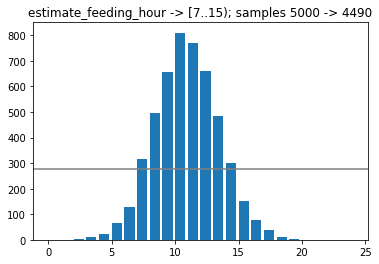

In [32]:
# Testing

# synthetic data
a = np.random.normal(11, scale=2.5, size=5000)
a = a.clip(0,24).astype(int)

start, end, included_count = estimate_feeding_hour(a)

# visualize
counts = np.bincount(a, minlength=24)
threshold = counts[3:21].sum() / 18
plt.hist(a, bins=24, range=(0,24), width=0.8)
plt.axhline(threshold, c='grey')
plt.title(f'estimate_feeding_hour -> [{start}..{end}); samples {len(a)} -> {included_count}');

In [29]:
# real data
counts = np.array([  61, 78, 70, 59, 59, 76, 113, 63,  293, 1150, 1511, 1151,  847,  564, 314,  111,  146,  107,   57,   60,   84,   78,  103,  117])
c = []
for i in range(24):
    c.extend([i]*counts[i])
a = np.array(c)

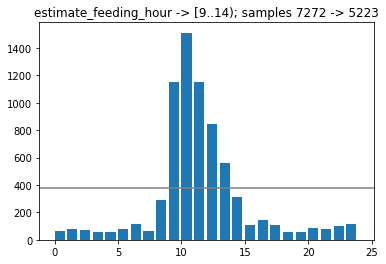

In [30]:
start, end, included_count = estimate_feeding_hour(a)

# visualize
counts = np.bincount(a, minlength=24)
threshold = counts[3:21].sum() / 18
plt.hist(a, bins=24, range=(0,24), width=0.8)
plt.axhline(threshold, c='grey')
plt.title(f'estimate_feeding_hour -> [{start}..{end}); samples {len(a)} -> {included_count}');